In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

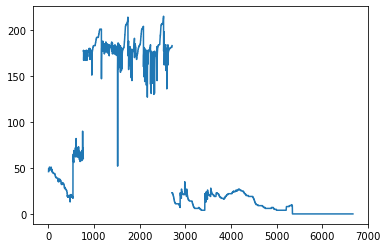

In [98]:
n = 11

devices = [
    "0a6a",
    "0a7c",
    "0a80",
    "0a83",
    "1efd",
    "1efe",
    "1eff",
    "1f0d",
    "1f02",
    "1f06",
    "1f08",
    "1f09",
    "1f10"
]

filename = "carouge_device_" + devices[n] + ".csv"

data = pd.read_csv("../data/" + filename)
data['time'] = pd.to_datetime(data['time'], unit = 's')
fig = px.line(data, x = 'time', y = 'value', title=filename)
#fig.update_layout(yaxis_range=[0,100])
fig.show()
plt.plot(data['value'].values)



In [81]:
filename = "carouge_WeatherObserved.csv"

start_time = pd.datetime(2020, 4, 22)
print(start_time)

weather = pd.read_csv("../data/" + filename)
weather["stampm"] = pd.to_datetime(weather["stampm"], unit = 's')
#display(weather)

2020-04-22 00:00:00


<ipython-input-81-4a70f314bf2c>:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [82]:
fig = px.line(weather[weather["stampm"]>start_time], x = 'stampm', y = 'humidity', title=filename)
fig.add_scatter(x = data['time'], y = data['value'], mode = 'lines', name = 'dampness',
               marker=dict(color='LightSkyBlue',
                            size=20))
#fig.update_layout(yaxis_range=[0,100])
fig.show()
